In [1]:
# Import of packages
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import math

In [89]:
def kernel(x, y, typeKer = "linear", p = 4, sigma = 0.5, kappa = 0.1, delta = 0.2):
    if typeKer == "linear":
        k = np.dot(x,y) + 1
    elif typeKer == "poly":
        k = (np.dot(x,y) + 1) ** p
    elif typeKer == "radial":
        k = math.exp(-(np.dot(x-y,x-y))/(2*sigma))
    elif typeKer == "sigmoid":
        k = math.atanh(kappa * np.dot(x,y) - delta)

    return k

In [283]:
def lagrange(params, eps, X, t, K):
    N2 = np.shape(params)[0]
    N = int(N2/2)
    a = params[0:N].reshape((N,1))
    a_hat = params[N:N2].reshape((N,1))
    t = t.reshape((N,1))
    L = (1/2) * (a - a_hat).T.dot(K).dot(a - a_hat) + eps * np.sum(a + a_hat) - (a - a_hat).T.dot(t)
    return L   

In [293]:
N = 100
tr = 0.6
ts = 0.4
N_tr = int(N*tr)
N_ts = int(N*ts)
x = np.linspace(0,5,num=N)
y = 3 * x + 2 + np.random.normal(loc=0, scale=1, size=N)
x_tr = x[0:N_tr]
y_tr = y[0:N_tr]
x_ts = x[N_ts:N]
y_ts = y[N_ts:N]

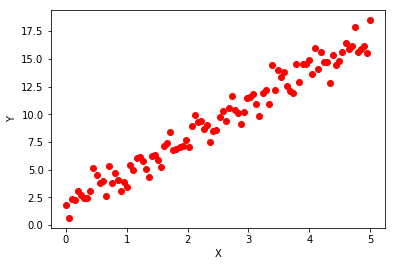

In [294]:
plt.plot(x,y, 'ro')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [295]:
eps = 0.5
C = 100
initial = np.zeros(2*N_tr)
K = np.zeros((N_tr,N_tr))
for i in range(N_tr):
    for j in range(N_tr):
        K[i,j] = kernel(x_tr[i],x_tr[j])
args = (eps, x_tr, y_tr, K)
bounds = []
for i in range(0,2*N_tr):
    bounds.append((0,C))
    
def constraint(params):
    N2 = np.shape(params)[0]
    N = int(N2/2)
    a = params[0:N]
    a_hat = params[N:N2]
    return np.sum(a - a_hat)

cons = {'type':'eq', 'fun': constraint}

final = optimize.minimize(lagrange, initial, args, bounds=bounds, constraints=cons, method='SLSQP')
print(final.success)
a = final.x[0:N_tr]
a_hat = final.x[N_tr:2*N_tr]
for i in range(0,N_tr):
    if (a[i] < C and a[i] > 0):
        tn = y_tr[i]
        ind = i
        break
b = tn - eps - (a - a_hat).T.dot(K)[ind]
cond_valuable = abs((a - a_hat)) > 1e-10
a = a[cond_valuable]
a_hat = a_hat[cond_valuable]
x_sv = x_tr[cond_valuable]
print(len(a))

True
40


In [296]:
def pred(a, a_hat, b, x_sv, x_ts, kernel):
    N_sv = np.shape(a)[0]
    N_ts = np.shape(x_ts)[0]
    a = a.reshape(N_sv,1)
    a_hat = a_hat.reshape(N_sv,1)
    print(N_sv)
    print(N_ts)
    print(np.shape((a-a_hat).T))
    K = np.zeros((N_sv, N_ts))
    print(np.shape(K))
    for i in range(N_sv):
        for j in range(N_ts):
            K[i,j] = kernel(x_sv[i],x_ts[j])
    y_ts = (a - a_hat).T.dot(K) + b
    y_ts = y_ts.reshape(-1)
    return y_ts
    
    

In [297]:
y_pred = pred(a, a_hat, b, x_sv, x_ts, kernel)

40
60
(1, 40)
(40, 60)


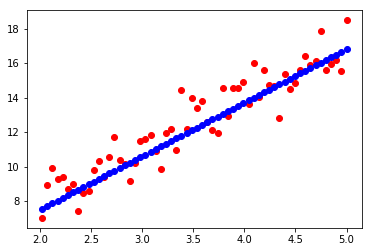

In [298]:
plt.plot(x_ts, y_ts,'ro')
plt.plot(x_ts, y_pred, 'bo')
plt.show()